# importing libraries

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")
import re

# Loading data

In [2]:
cars = pd.read_csv('../../Data/output.csv')

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      4009 non-null   object 
 1   model                      4009 non-null   object 
 2   model_year                 4009 non-null   int64  
 3   fuel_type                  4009 non-null   object 
 4   engine                     4009 non-null   object 
 5   transmission               4009 non-null   object 
 6   ext_col                    4009 non-null   object 
 7   int_col                    4009 non-null   object 
 8   accident                   4009 non-null   int64  
 9   clean_title                4009 non-null   int64  
 10  price                      4009 non-null   float64
 11  years_used                 4009 non-null   int64  
 12  capacity                   4009 non-null   float64
 13  horsepower                 4009 non-null   float

In [4]:
cars.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,...,mileage_with_age,mileage_per_year_with_age,mileage_brand,mileage,speed,brand_category,log_price,power_to_weight_ratio,brand_frequency,model_frequency
0,Ford,Utility Police Interceptor Base,2013,Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,black,black,1,1,...,90750.050633,8250.004603,72295.461140,51000,6.0,economy,9.239996,81.081081,386,3
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,Automatic,other,gray,1,1,...,28360.137143,9453.379048,66143.986111,34742,8.0,economy,10.545499,87.241001,72,3
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,blue,black,0,0,...,15360.254237,7680.127119,78124.098160,22372,NaN,luxury,10.907771,94.718802,163,1
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,black,black,0,1,...,82228.061404,9136.451267,82025.796610,88900,7.0,luxury,9.648660,101.142857,59,1
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,white,black,0,0,...,28360.137143,9453.379048,57713.305000,9835,8.0,luxury,10.463103,165.757903,200,1


In [5]:
cars.columns

Index(['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'years_used',
       'capacity', 'horsepower', 'engine_type', 'cylinder_count',
       'fuel_injection', 'mileage_per_year', 'mileage_sqrt',
       'mileage_with_age', 'mileage_per_year_with_age', 'mileage_brand',
       'mileage', 'speed', 'brand_category', 'log_price',
       'power_to_weight_ratio', 'brand_frequency', 'model_frequency'],
      dtype='object')

In [6]:
df = cars.copy()  #makinga copy of original data set

print('Original Data Shape:',df.shape)


Original Data Shape: (4009, 29)


In [7]:
df.fuel_type.value_counts()

fuel_type
Gasoline     3356
Hybrid        228
Electric      170
Flex Fuel     139
Diesel        116
Name: count, dtype: int64

In [8]:
df_electric = df[df['fuel_type'] == 'Electric']

# DataFrame with all other fuel types
df_non_electric = df[df['fuel_type'] != 'Electric']

In [9]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 9 to 4006
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      170 non-null    object 
 1   model                      170 non-null    object 
 2   model_year                 170 non-null    int64  
 3   fuel_type                  170 non-null    object 
 4   engine                     170 non-null    object 
 5   transmission               170 non-null    object 
 6   ext_col                    170 non-null    object 
 7   int_col                    170 non-null    object 
 8   accident                   170 non-null    int64  
 9   clean_title                170 non-null    int64  
 10  price                      170 non-null    float64
 11  years_used                 170 non-null    int64  
 12  capacity                   170 non-null    float64
 13  horsepower                 170 non-null    float64
 14

# Explainatory Data Analysis and data cleaning

In [10]:
df_cars=df_non_electric.copy()

In [11]:
# Check the structure and summary
df_cars.info()
df_cars.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3839 entries, 0 to 4008
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      3839 non-null   object 
 1   model                      3839 non-null   object 
 2   model_year                 3839 non-null   int64  
 3   fuel_type                  3839 non-null   object 
 4   engine                     3839 non-null   object 
 5   transmission               3839 non-null   object 
 6   ext_col                    3839 non-null   object 
 7   int_col                    3839 non-null   object 
 8   accident                   3839 non-null   int64  
 9   clean_title                3839 non-null   int64  
 10  price                      3839 non-null   float64
 11  years_used                 3839 non-null   int64  
 12  capacity                   3839 non-null   float64
 13  horsepower                 3839 non-null   float64
 1

,model_year,accident,clean_title,price,years_used,capacity,horsepower,cylinder_count,mileage_per_year,mileage_sqrt,mileage_with_age,mileage_per_year_with_age,mileage_brand,mileage,speed,log_price,power_to_weight_ratio,brand_frequency,model_frequency
count,3839.000000,3839.000000,3839.000000,3.839000e+03,3839.000000,3839.000000,3839.000000,3839.000000,3839.000000,3839.000000,3839.000000,3839.000000,3839.000000,3839.000000,2108.000000,3839.000000,3839.000000,3839.000000,3839.000000
mean,2015.299036,0.254754,0.851003,4.413167e+04,8.700964,3.691264,326.848365,6.034498,8210.540761,235.522409,66208.111199,8153.583269,65747.379404,66439.403751,7.040797,10.282096,95.492350,193.382912,4.434228
std,6.125718,0.435780,0.356132,8.021373e+04,6.125718,1.405135,101.969129,1.638211,5124.957514,104.744721,35275.343677,1491.324513,15943.488828,52514.820739,1.532203,0.854842,31.933739,125.198351,4.761129
min,1974.000000,0.000000,0.000000,2.000000e+03,0.000000,1.000000,70.000000,0.000000,50.000000,10.000000,1383.833333,124.340000,6330.000000,100.000000,1.000000,7.601402,27.692308,1.000000,1.000000
25%,2012.000000,0.000000,1.000000,1.699500e+04,4.000000,2.500000,265.000000,4.000000,4649.466667,156.524758,35051.801242,7370.877857,57136.946154,24500.000000,6.000000,9.740733,71.428571,76.000000,1.000000
50%,2017.000000,0.000000,1.000000,3.000000e+04,7.000000,3.500000,331.515805,6.000000,7619.444444,234.520788,69980.332046,8762.950311,66352.139860,55000.000000,7.000000,10.308986,89.333333,199.000000,3.000000
75%,2020.000000,1.000000,1.000000,4.897000e+04,12.000000,4.600000,380.000000,8.000000,10860.871429,309.838668,98675.028369,9136.451267,75869.890625,96000.000000,8.000000,10.798983,113.333333,315.000000,5.000000
max,2024.000000,1.000000,1.000000,2.954083e+06,50.000000,8.400000,808.000000,12.000000,49875.000000,636.396103,163737.000000,9997.190292,132629.187500,405000.000000,10.000000,14.898699,276.263171,386.000000,30.000000


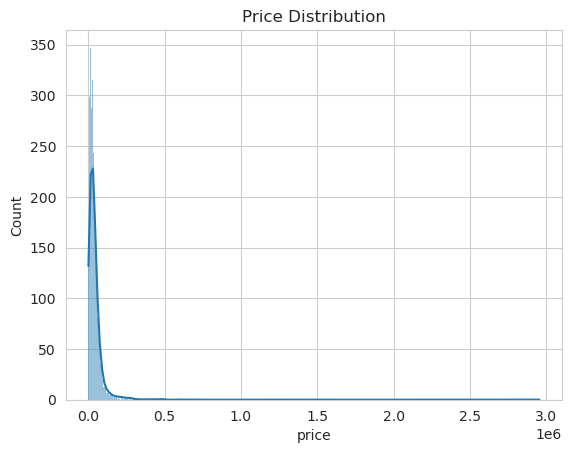

In [12]:
sns.histplot(df_cars['price'], kde=True)
plt.title("Price Distribution")
plt.show()


In [13]:
df_cars= df_cars.drop(columns=['speed', 'fuel_injection', 'engine_type', 'engine'])


/home/manjeet/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/dython/nominal.py:187: RuntimeWarning: Rounded V = 1.0000000000000002 to 1.0. This is probably due to floating point precision issues.
  warnings.warn(


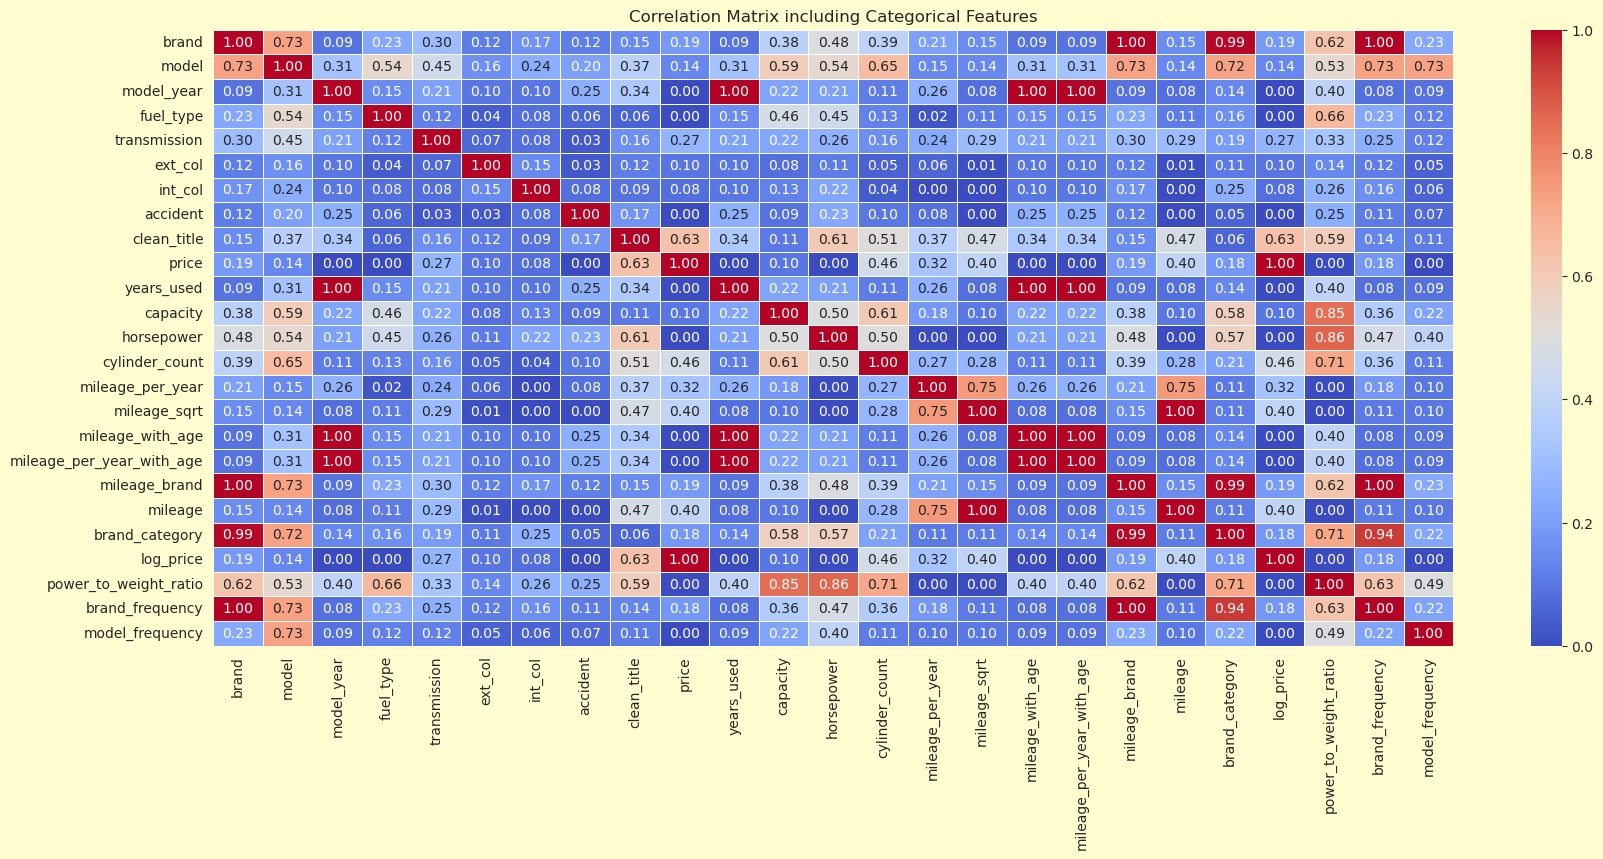

In [14]:
# Correlation heatmap
from dython.nominal import associations

associations_df = associations(df_cars, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()


In [15]:
# Set a correlation threshold (you can adjust this)
threshold = 0.5

# Extract pairs of features with correlation greater than threshold
high_corr_features = corr_matrix[abs(corr_matrix) > threshold]
high_corr_features = high_corr_features.dropna(axis=0, how='all').dropna(axis=1, how='all')  # Remove empty rows and columns

# Display the high correlation features
print(high_corr_features.to_dict())

{'brand': {'brand': 1.0, 'model': 0.7289158010716257, 'model_year': nan, 'fuel_type': nan, 'transmission': nan, 'ext_col': nan, 'int_col': nan, 'accident': nan, 'clean_title': nan, 'price': nan, 'years_used': nan, 'capacity': nan, 'horsepower': nan, 'cylinder_count': nan, 'mileage_per_year': nan, 'mileage_sqrt': nan, 'mileage_with_age': nan, 'mileage_per_year_with_age': nan, 'mileage_brand': 1.0, 'mileage': nan, 'brand_category': 0.9934631277441178, 'log_price': nan, 'power_to_weight_ratio': 0.6220331340674289, 'brand_frequency': 0.998419387842343, 'model_frequency': nan}, 'model': {'brand': 0.7289158010716257, 'model': 1.0, 'model_year': nan, 'fuel_type': 0.5356635372907413, 'transmission': nan, 'ext_col': nan, 'int_col': nan, 'accident': nan, 'clean_title': nan, 'price': nan, 'years_used': nan, 'capacity': 0.59327435030718, 'horsepower': 0.5365002428044932, 'cylinder_count': 0.6542647140874235, 'mileage_per_year': nan, 'mileage_sqrt': nan, 'mileage_with_age': nan, 'mileage_per_year_w

In [16]:
# Category frequencies
pd.set_option('display.max_rows', None)
print(df_cars['brand'].value_counts().to_dict())


{'Ford': 375, 'BMW': 370, 'Mercedes-Benz': 312, 'Chevrolet': 287, 'Toyota': 196, 'Audi': 194, 'Porsche': 192, 'Lexus': 163, 'Jeep': 143, 'Land': 130, 'Nissan': 111, 'Cadillac': 106, 'RAM': 91, 'GMC': 90, 'Dodge': 90, 'Kia': 73, 'Hyundai': 69, 'Acura': 64, 'Mazda': 64, 'Subaru': 64, 'Honda': 63, 'INFINITI': 59, 'Volkswagen': 56, 'Lincoln': 52, 'Jaguar': 47, 'Volvo': 37, 'Maserati': 34, 'Bentley': 33, 'MINI': 33, 'Buick': 30, 'Chrysler': 28, 'Lamborghini': 26, 'Mitsubishi': 20, 'Genesis': 20, 'Alfa': 19, 'Hummer': 16, 'Pontiac': 15, 'Ferrari': 12, 'Rolls-Royce': 11, 'Aston': 9, 'Scion': 6, 'McLaren': 6, 'Saturn': 5, 'Lotus': 4, 'FIAT': 4, 'Mercury': 3, 'Saab': 2, 'Bugatti': 1, 'Plymouth': 1, 'smart': 1, 'Maybach': 1, 'Suzuki': 1}


In [17]:
print(df_cars['fuel_type'].value_counts())

fuel_type
Gasoline     3356
Hybrid        228
Flex Fuel     139
Diesel        116
Name: count, dtype: int64


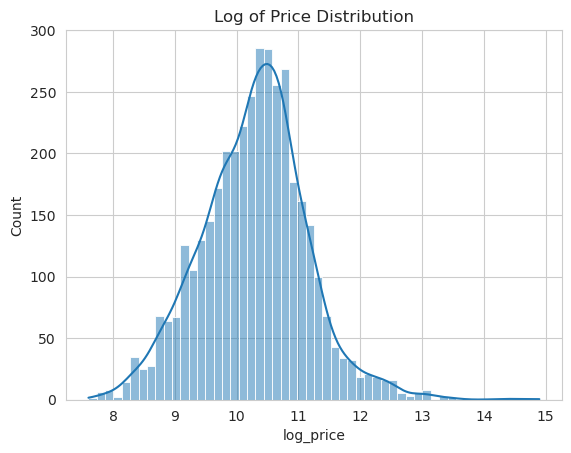

In [18]:
# Visualize log_price distribution
sns.histplot(df_cars['log_price'], kde=True)
plt.title("Log of Price Distribution")
plt.show()


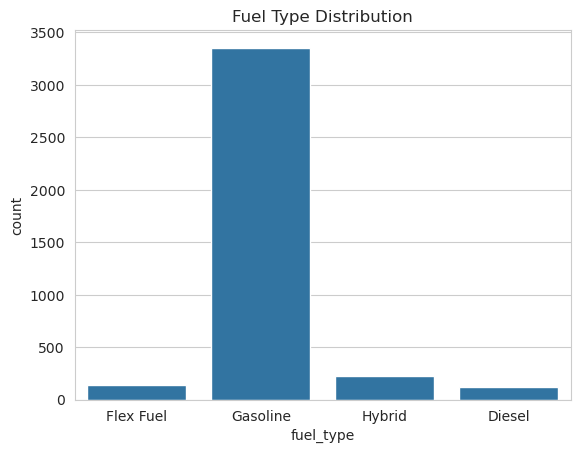

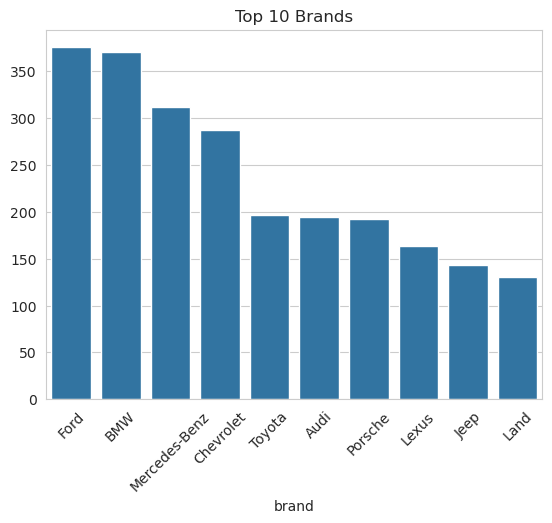

In [19]:
# Fuel type distribution
sns.countplot(x='fuel_type', data=df_cars)
plt.title("Fuel Type Distribution")
plt.show()

# Brand distribution (top 10 brands)
top_brands = df_cars['brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Brands")
plt.xticks(rotation=45)
plt.show()


In [20]:
df_cars.isnull().sum()

brand                        0
model                        0
model_year                   0
fuel_type                    0
transmission                 0
ext_col                      0
int_col                      0
accident                     0
clean_title                  0
price                        0
years_used                   0
capacity                     0
horsepower                   0
cylinder_count               0
mileage_per_year             0
mileage_sqrt                 0
mileage_with_age             0
mileage_per_year_with_age    0
mileage_brand                0
mileage                      0
brand_category               0
log_price                    0
power_to_weight_ratio        0
brand_frequency              0
model_frequency              0
dtype: int64

<Axes: xlabel='years_used', ylabel='price'>

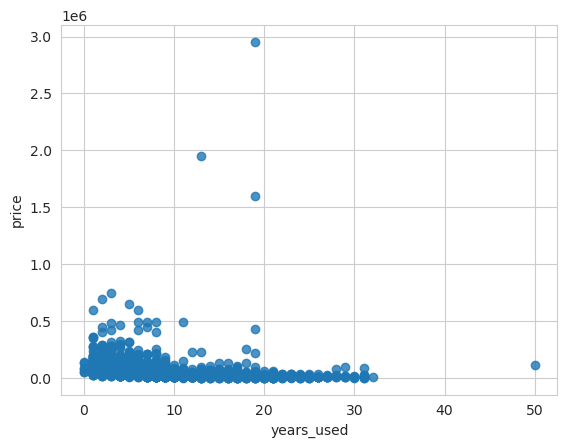

In [21]:
sns.regplot(x='years_used', y='price', scatter=True, fit_reg=False, data=df_non_electric)

In [22]:
sum(df_non_electric['price'] > 500000), sum(df_non_electric['price'] < 10000)

(8, 424)

In [23]:
df_cars = df_non_electric[ (df_non_electric.price <= 400000)]

<Axes: ylabel='years_used'>

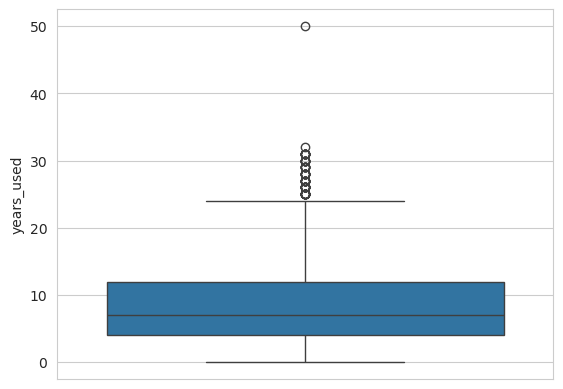

In [24]:
sns.boxplot(y=df_cars['years_used'])

In [25]:
sum(df_cars['years_used'] > 40), sum(df_cars['years_used'] < 1)

(1, 6)

In [26]:

large_age = df_cars[(df_cars['years_used']<=1)].index.tolist()

# Extract values from columns 'B' and 'C' at those indices and combine them into a new DataFrame
price_at_large_age = df_cars.loc[large_age, ['price','brand','brand_category']]
price_at_large_age

,price,brand,brand_category
20,60000.0,Genesis,luxury
23,58504.0,Ford,economy
41,45498.0,Honda,economy
56,30999.0,Nissan,economy
65,67900.0,BMW,luxury
67,46900.0,Cadillac,luxury
73,49950.0,Toyota,economy
76,359991.0,Lamborghini,luxury
83,47999.0,Volkswagen,economy
90,34000.0,Hyundai,economy


<Axes: ylabel='years_used'>

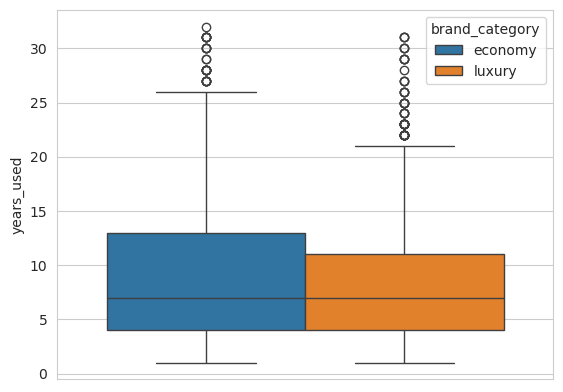

In [27]:
df_cars = df_cars[(df_cars.years_used <= 40) & (df_cars.years_used >= 1)]
sns.boxplot(y=df_cars['years_used'], hue=df_cars['brand_category'])

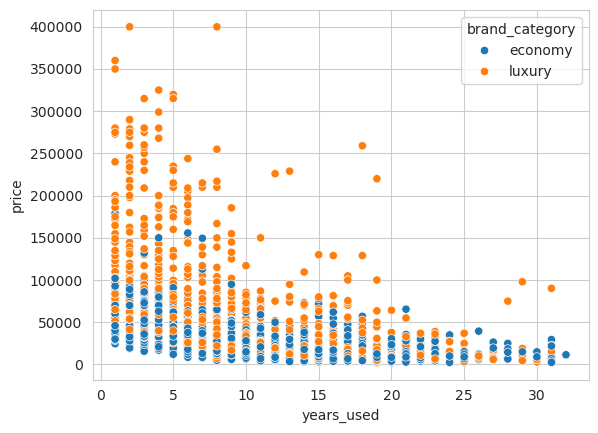

In [28]:
sns.scatterplot(x='years_used', y='price', data=df_cars, hue='brand_category')

plt.show()


In [29]:
df_cars = df_cars.drop(['speed','fuel_injection','engine_type','engine'],axis=1)

In [30]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3813 entries, 0 to 4008
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      3813 non-null   object 
 1   model                      3813 non-null   object 
 2   model_year                 3813 non-null   int64  
 3   fuel_type                  3813 non-null   object 
 4   transmission               3813 non-null   object 
 5   ext_col                    3813 non-null   object 
 6   int_col                    3813 non-null   object 
 7   accident                   3813 non-null   int64  
 8   clean_title                3813 non-null   int64  
 9   price                      3813 non-null   float64
 10  years_used                 3813 non-null   int64  
 11  capacity                   3813 non-null   float64
 12  horsepower                 3813 non-null   float64
 13  cylinder_count             3813 non-null   float64
 1

In [31]:
df_cars['capacity'].fillna(value= df_cars['capacity'].mean(),inplace=True)
df_cars['horsepower'].fillna(value= df_cars['horsepower'].mean(),inplace=True)
df_cars['cylinder_count'].fillna(value= df_cars['cylinder_count'].mean(),inplace=True)
df_cars['fuel_type'].fillna(value= 'Gasoline',inplace=True)

df_cars['power_to_weight_ratio'] = df_cars['horsepower'] / df_cars['capacity']

/tmp/ipykernel_4254/772245431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cars['capacity'].fillna(value= df_cars['capacity'].mean(),inplace=True)
/tmp/ipykernel_4254/772245431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [32]:
df_cars.isnull().sum()

brand                        0
model                        0
model_year                   0
fuel_type                    0
transmission                 0
ext_col                      0
int_col                      0
accident                     0
clean_title                  0
price                        0
years_used                   0
capacity                     0
horsepower                   0
cylinder_count               0
mileage_per_year             0
mileage_sqrt                 0
mileage_with_age             0
mileage_per_year_with_age    0
mileage_brand                0
mileage                      0
brand_category               0
log_price                    0
power_to_weight_ratio        0
brand_frequency              0
model_frequency              0
dtype: int64

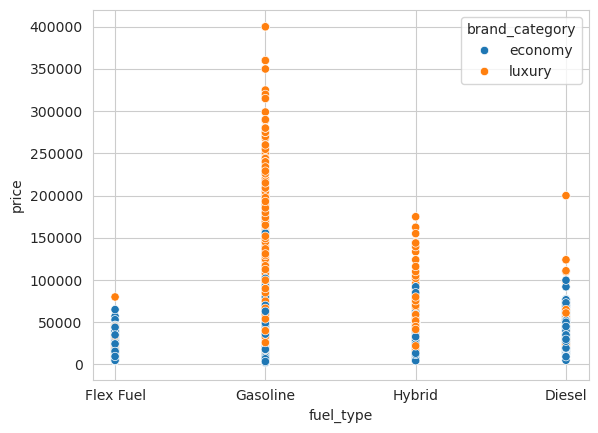

In [33]:
sns.scatterplot(x='fuel_type', y='price', data=df_cars, hue='brand_category')

plt.show()

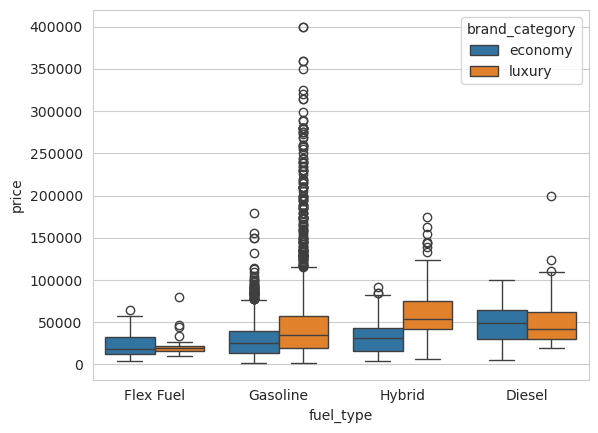

In [34]:
sns.boxplot(x='fuel_type', y='price', data=df_cars, hue='brand_category')

plt.show()

<Axes: xlabel='log_price', ylabel='Count'>

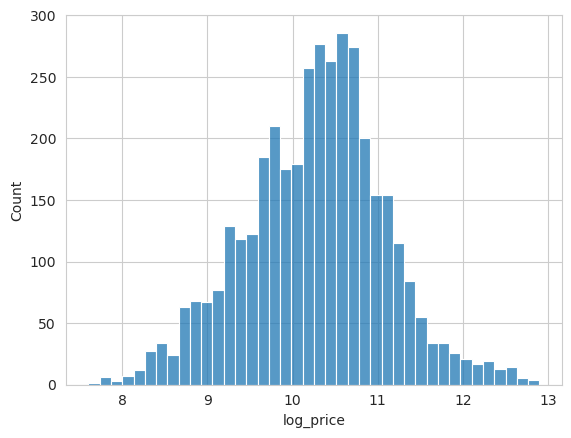

In [35]:
sns.histplot(df_cars['log_price'],kde=False) 

In [36]:
df_cars.years_used.dtype
df_cars['years_used']=df_cars['years_used'].astype('float')

<Axes: xlabel='years_used', ylabel='Count'>

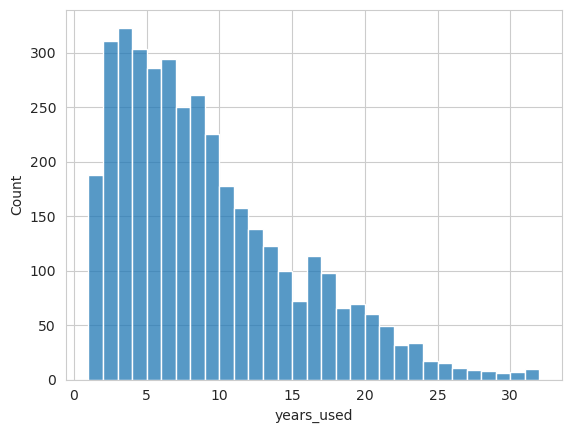

In [37]:
sns.histplot(np.pow(df_cars['years_used'],1),kde=False) 

In [38]:
# # Find indices where column 'A' has null values
# cap_null_indices = df_cars[df_cars['horsepower']>=00].index.tolist()
# print("Indices where column 'capacity' has null values:", cap_null_indices)

# # Extract values from columns 'B' and 'C' at those indices and combine them into a new DataFrame
# values_brand_model_modelyear_at_null_cap = df_cars.loc[cap_null_indices, ['brand', 'model','model_year','capacity','fuel_type','horsepower']]
# values_brand_model_modelyear_at_null_cap.tail(40)

<Axes: ylabel='horsepower'>

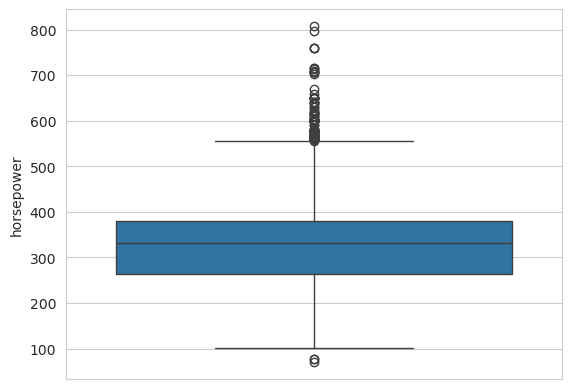

In [39]:
sns.boxplot(y=df_cars['horsepower'])

In [40]:
df_cars.columns

Index(['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title', 'price', 'years_used', 'capacity',
       'horsepower', 'cylinder_count', 'mileage_per_year', 'mileage_sqrt',
       'mileage_with_age', 'mileage_per_year_with_age', 'mileage_brand',
       'mileage', 'brand_category', 'log_price', 'power_to_weight_ratio',
       'brand_frequency', 'model_frequency'],
      dtype='object')

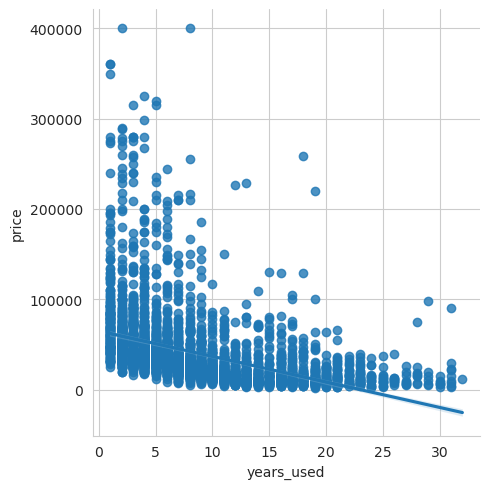

In [41]:
sns.lmplot(data=df_cars, x='years_used', y='price')

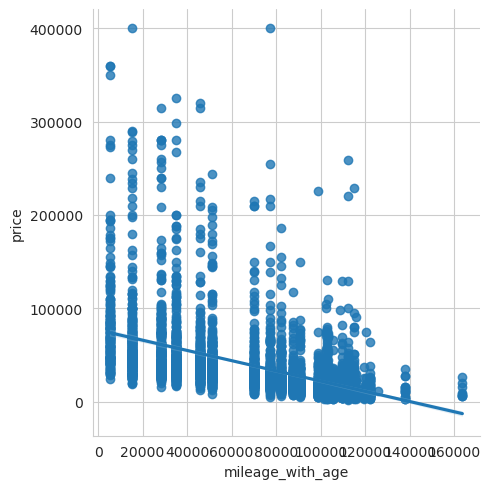

In [42]:
sns.lmplot(data=df_cars, x='mileage_with_age', y='price')

<Axes: xlabel='mileage_per_year', ylabel='Count'>

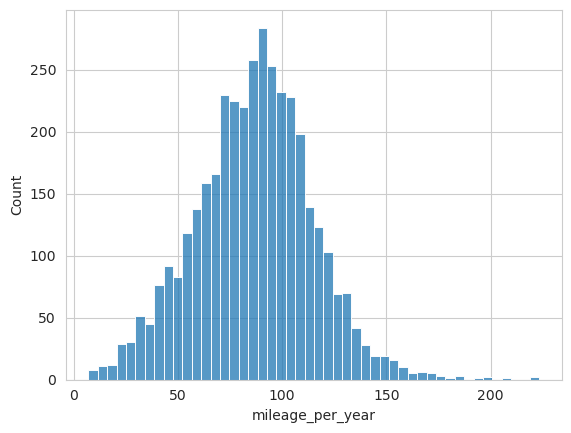

In [43]:
sns.histplot(np.sqrt(df_cars['mileage_per_year']),kde=False) 

<Axes: xlabel='mileage_per_year_with_age', ylabel='Count'>

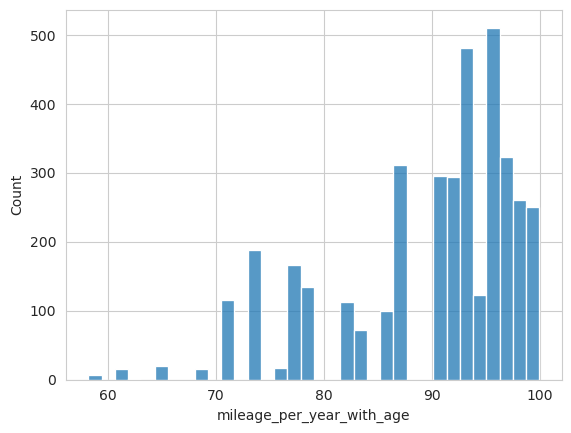

In [44]:
sns.histplot(np.sqrt(df_cars['mileage_per_year_with_age']),kde=False) 

In [45]:
df_cars[['price','mileage','mileage_per_year','years_used']].corr()

,price,mileage,mileage_per_year,years_used
price,1.000000,-0.505766,-0.272096,-0.424590
mileage,-0.505766,1.000000,0.523231,0.613178
mileage_per_year,-0.272096,0.523231,1.000000,-0.163383
years_used,-0.424590,0.613178,-0.163383,1.000000


<Axes: xlabel='power_to_weight_ratio', ylabel='Count'>

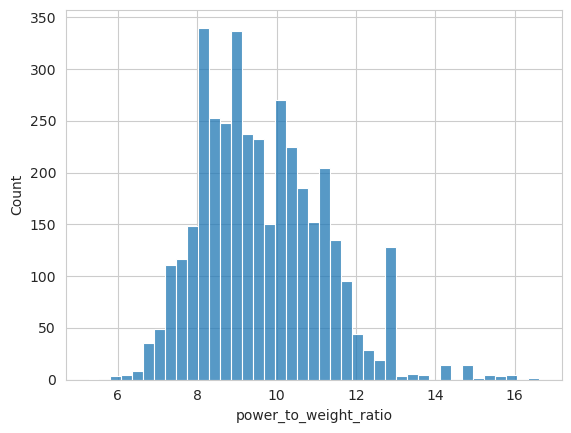

In [46]:
sns.histplot(np.sqrt(df_cars['power_to_weight_ratio']),kde=False) 

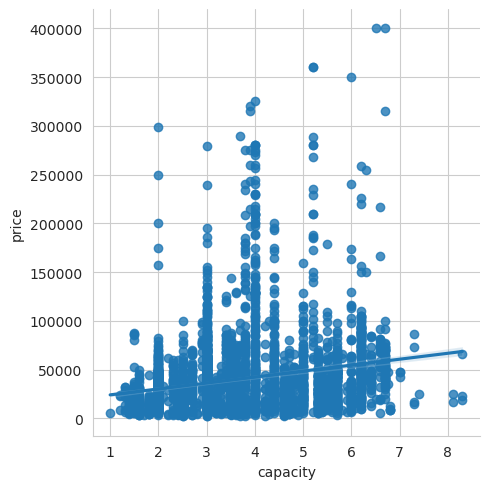

In [47]:
sns.lmplot(data=df_cars, x='capacity', y='price')

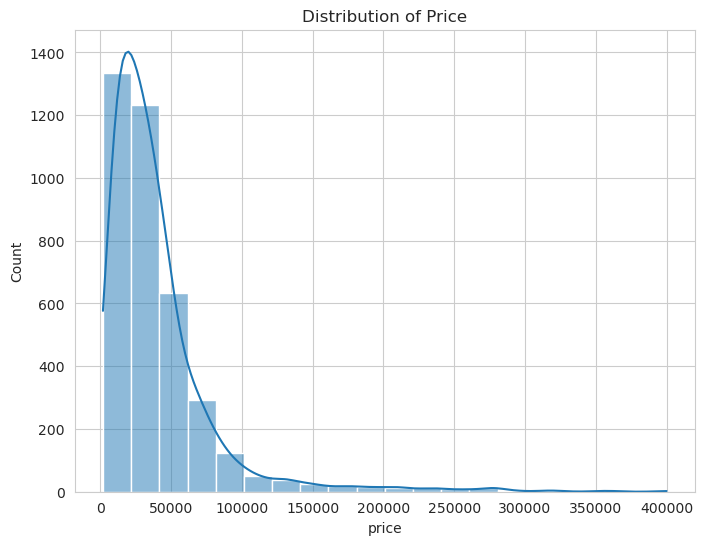

In [48]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cars['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

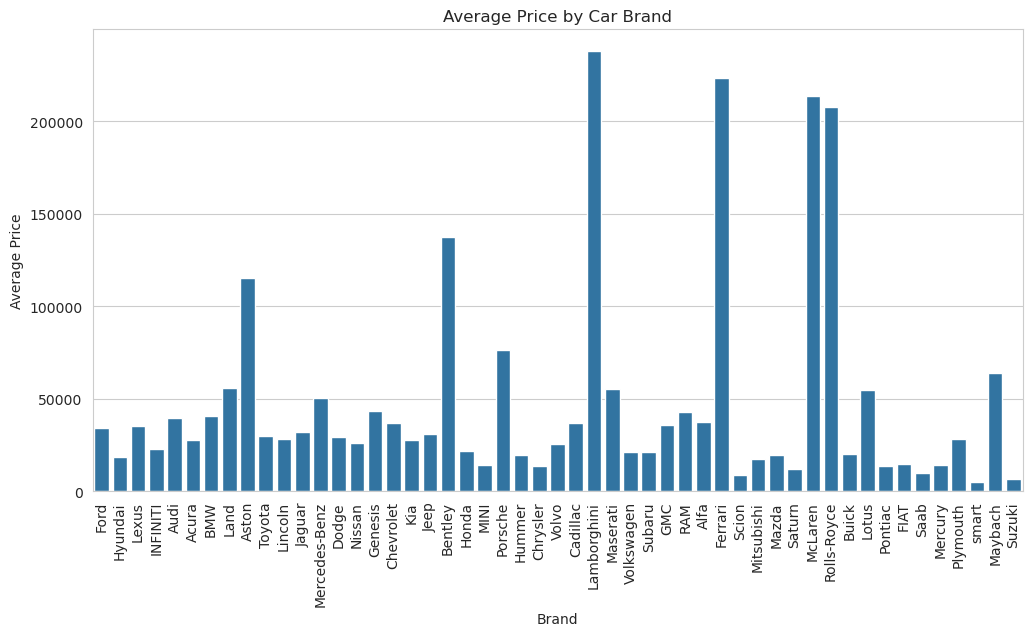

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df_cars, errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

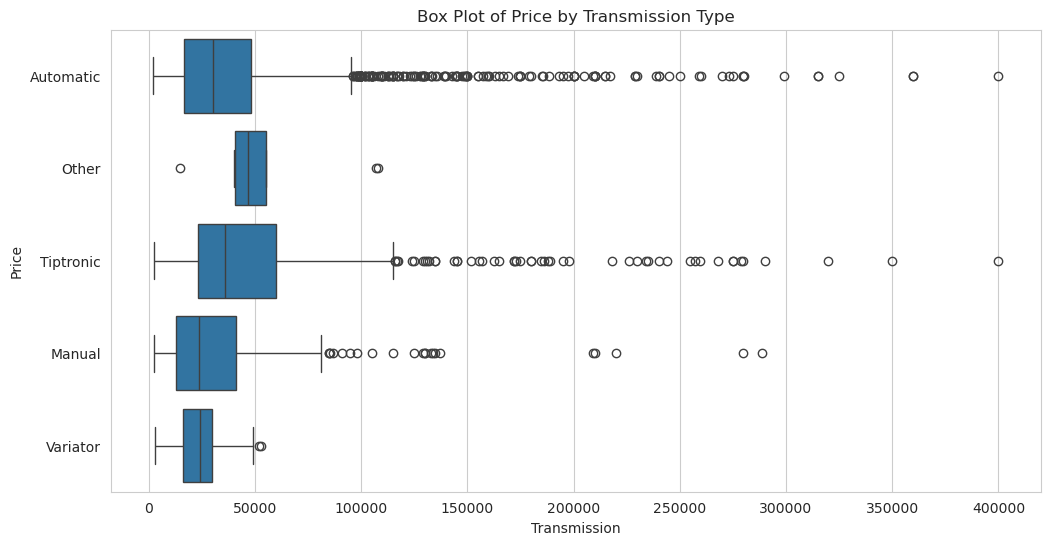

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='transmission', data=df_cars,orient='h')
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
#plt.xticks(rotation=90) 
plt.show()

In [51]:
#pip install dython

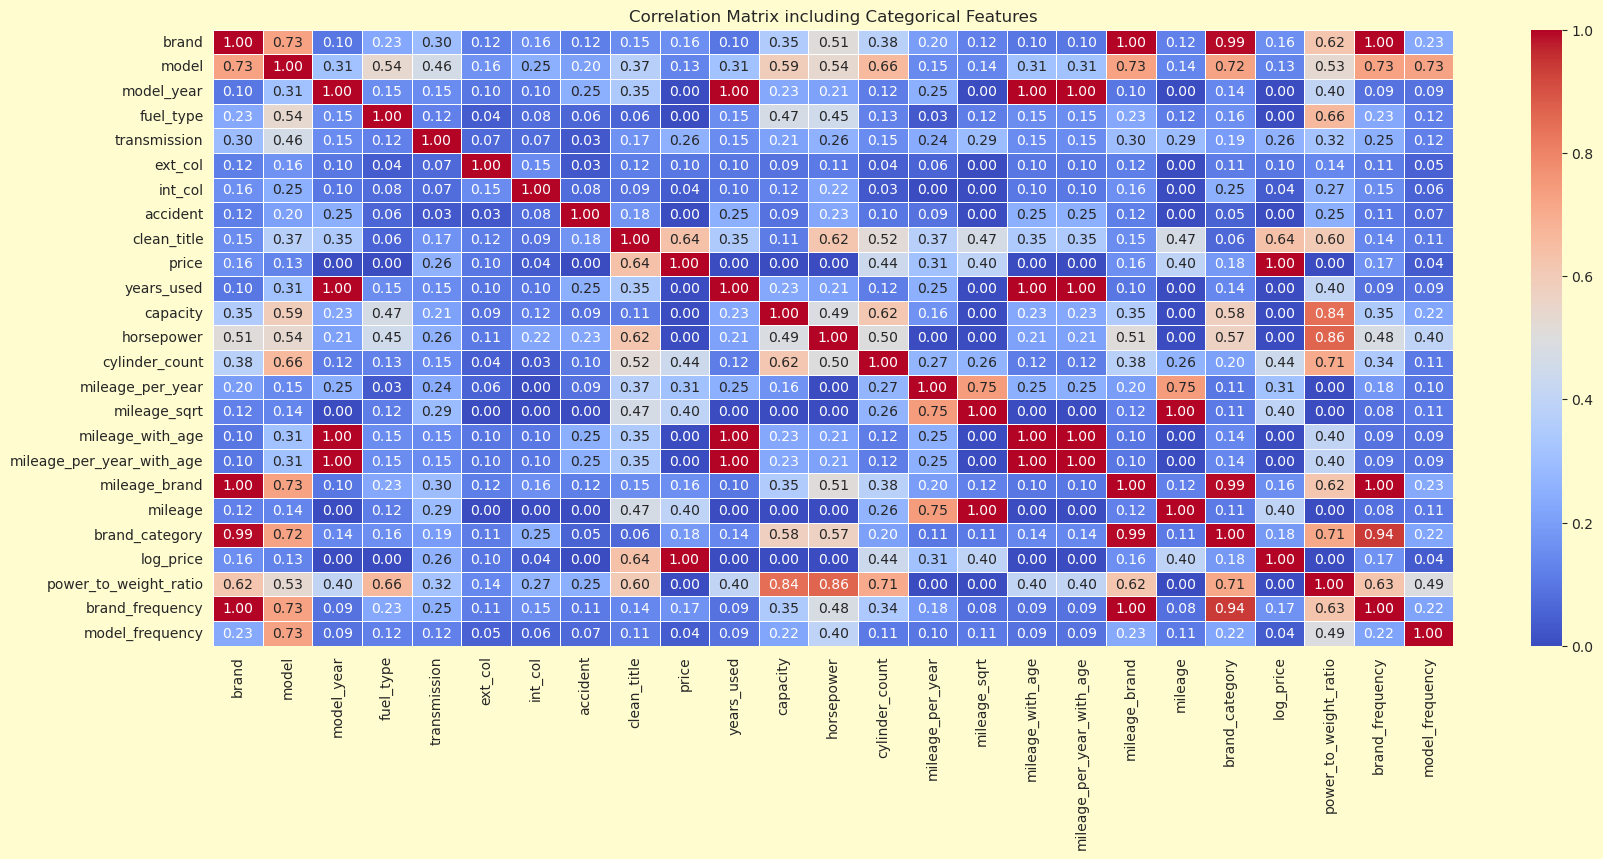

In [52]:
from dython.nominal import associations

associations_df = associations(df_cars, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [53]:
df_cars['brand_frequency'] = df_cars['brand'].map(df_cars['brand'].value_counts())
df_cars['model_frequency'] = df_cars['model'].map(df_cars['model'].value_counts())

In [54]:
brand_price_map = df_cars.groupby('brand')['price'].mean()
df_cars['brand_target_enc'] = df_cars['brand'].map(brand_price_map)

model_price_map = df_cars.groupby('model')['price'].mean()
df_cars['model_target_enc'] = df_cars['model'].map(model_price_map)

In [55]:
df_cars[['brand','brand_frequency']].head()

,brand,brand_frequency
0,Ford,373
1,Hyundai,69
2,Lexus,162
3,INFINITI,59
4,Audi,194


In [56]:
df_cars[['brand','brand_frequency','model','model_frequency']].head(56)

,brand,brand_frequency,model,model_frequency
0,Ford,373,Utility Police Interceptor Base,3
1,Hyundai,69,Palisade SEL,3
2,Lexus,162,RX 350 RX 350,1
3,INFINITI,59,Q50 Hybrid Sport,1
4,Audi,194,Q3 45 S line Premium Plus,1
5,Acura,64,ILX 2.4L,1
6,Audi,194,S3 2.0T Premium Plus,2
7,BMW,367,740 iL,1
8,Lexus,162,RC 350 F Sport,1
10,Land,130,Rover Range Rover Sport 3.0 Supercharged HST,1


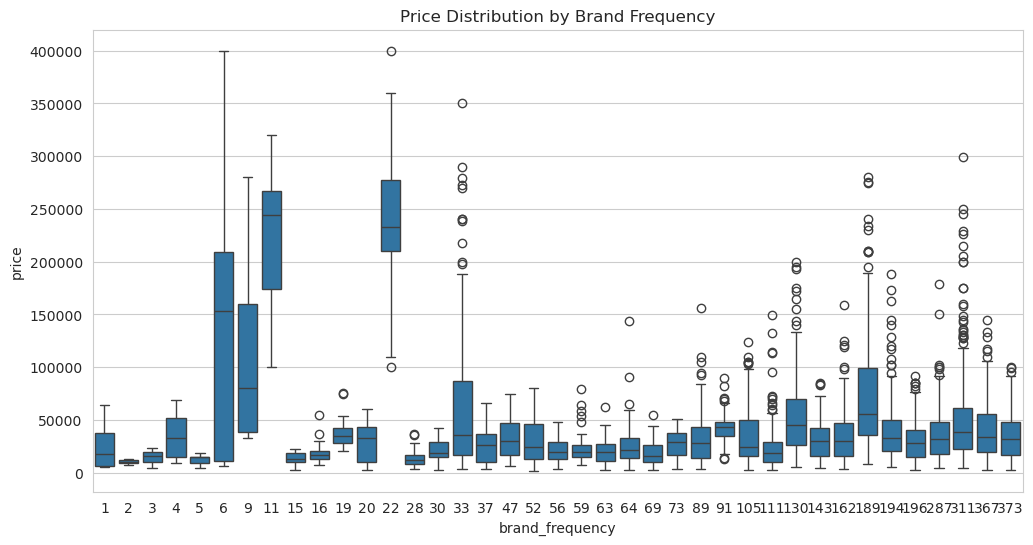

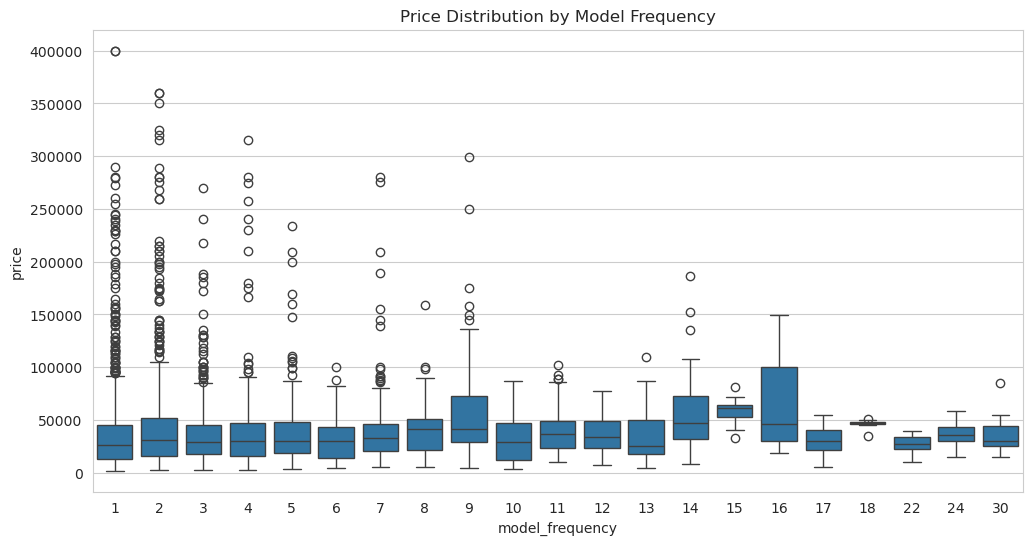

In [57]:
# Box plot for brand frequency impact on price
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_frequency', y='price', data=df_cars)
plt.title("Price Distribution by Brand Frequency")
plt.show()

# Box plot for model frequency impact on price
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_frequency', y='price', data=df_cars)
plt.title("Price Distribution by Model Frequency")
plt.show()

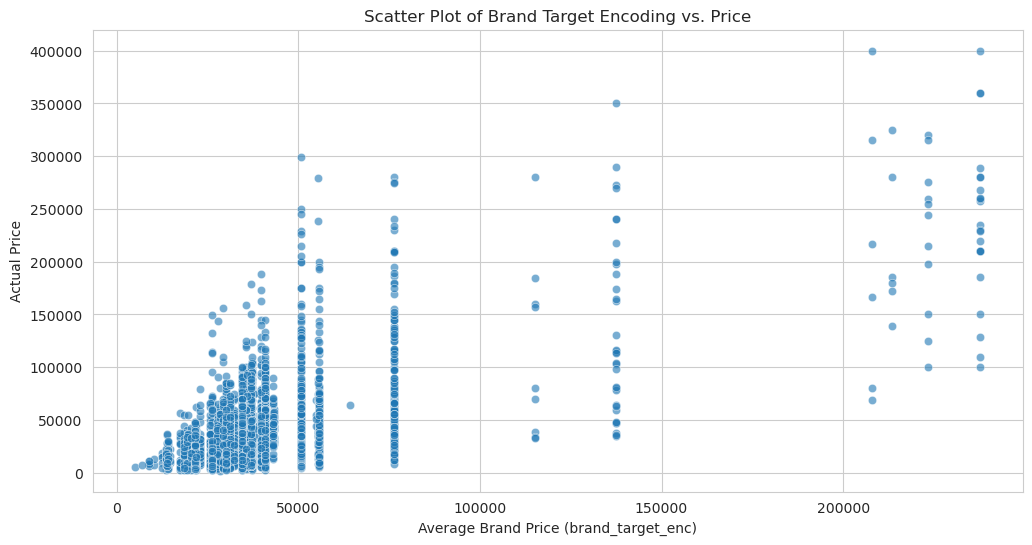

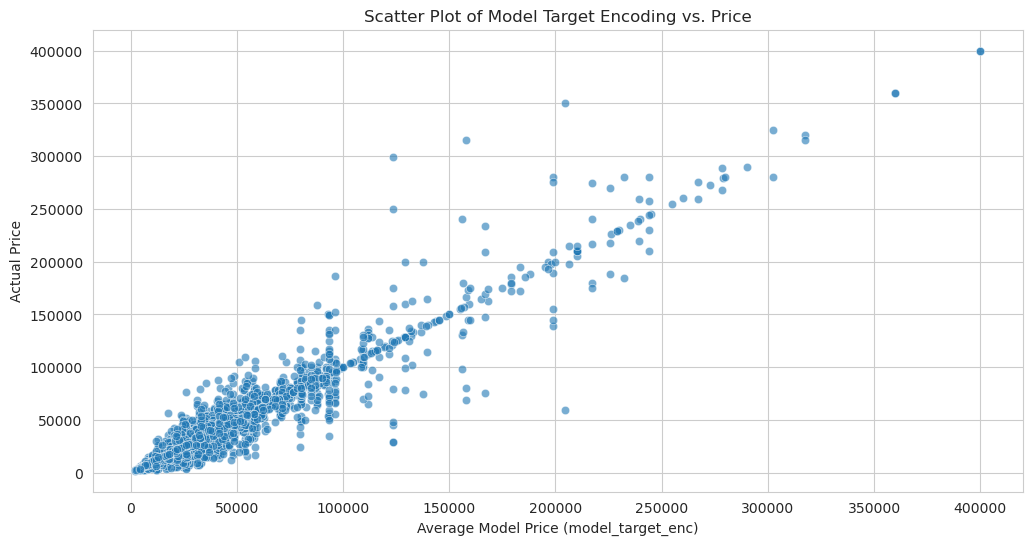

In [58]:
# Box plot for brand frequency impact on price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='brand_target_enc', y='price', data=df_cars, alpha=0.6)
plt.title('Scatter Plot of Brand Target Encoding vs. Price')
plt.xlabel('Average Brand Price (brand_target_enc)')
plt.ylabel('Actual Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='model_target_enc', y='price', data=df_cars, alpha=0.6)
plt.title('Scatter Plot of Model Target Encoding vs. Price')
plt.xlabel('Average Model Price (model_target_enc)')
plt.ylabel('Actual Price')
plt.show()

In [59]:
df_cars.fuel_type.unique()

array(['Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel'], dtype=object)

In [60]:
df_cars.price.describe()

count      3813.000000
mean      40355.861264
std       40517.138285
min        2000.000000
25%       16900.000000
50%       30000.000000
75%       48000.000000
max      399950.000000
Name: price, dtype: float64

Metric	    Target Range

MAE	          2,000–8,000

RMSE	      3,000–12,000

MAPE	      ≤15% (across all prices)

R² Score	  >0.80, ideally >0.85

# Dropping unwanted and unimportant columns

In [61]:
df_cars.capacity.isnull().sum()

np.int64(0)

In [62]:
df_cars['mileage_per_year_sqrt']=np.sqrt(df_cars['mileage_per_year'])
df_cars['mileage_times_age']=df_cars['years_used']*df_cars['mileage']
df_cars['mileage_sqrt_times_age']=df_cars['years_used']*df_cars['mileage']
df_cars['horsepower_times_cylinder_count']=df_cars['horsepower']*df_cars['cylinder_count']
df_cars['capacity_mileage_interaction'] = df_cars['capacity'] * df_cars['mileage_sqrt']
df_cars['age_squared'] = df_cars['years_used'] ** 2
df_cars['mileage_binned'] = pd.cut(df_cars['mileage'], bins=[0, 50000, 100000, 150000, 200000], labels=['Low', 'Medium', 'High', 'Very High'])
df_cars['log_mileage'] = np.log(df_cars['mileage'] + 1)  # Adding 1 to avoid log(0)
df_cars['log_capacity'] = np.log(df_cars['capacity'] + 1)
df_cars['capacity_binned'] = pd.cut(df_cars['capacity'], bins=[1,3,5,7,9], labels=[2,4,6,8])
df_cars['capacity_binned'] = df_cars['capacity_binned'].astype(float)
df_cars['horsepower_binned'] = pd.cut(df_cars['horsepower'], bins=[150,250,350,450,550,650,750,850], labels=[200,300,400,500,600,700,800])
df_cars['horsepower_binned'] = df_cars['horsepower_binned'].astype(float)
df_cars['age_binned'] = pd.cut(df_cars['years_used'], bins=[1,6,12,18,24,30,36], labels=[3,9,15,21,27,33])
df_cars['age_binned'] = df_cars['age_binned'].astype(float)
df_cars['trans_num'] = df_cars['transmission'].replace({'Automatic':1,'Tiptronic':1,'Variator':1,'Other':0,'Manual':0}).astype(float)
df_cars['brand_enc'] = df_cars['brand_category'].replace({'luxury':1,'economy':0}).astype(float)

/tmp/ipykernel_4254/792172974.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cars['trans_num'] = df_cars['transmission'].replace({'Automatic':1,'Tiptronic':1,'Variator':1,'Other':0,'Manual':0}).astype(float)
/tmp/ipykernel_4254/792172974.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cars['brand_enc'] = df_cars['brand_category'].replace({'luxury':1,'economy':0}).astype(float)


In [63]:
from sklearn.impute import SimpleImputer

# Initialize the imputer (mean strategy will fill NaNs with the column mean)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies

# Apply the imputer to the columns (you can apply it only to the binned columns if needed)
df_cars[['capacity_binned']] = imputer.fit_transform(df_cars[['capacity_binned']])
df_cars[['horsepower_binned']] = imputer.fit_transform(df_cars[['horsepower_binned']])
df_cars[['age_binned']] = imputer.fit_transform(df_cars[['age_binned']])



In [64]:
# Example DataFrame

data = pd.DataFrame(df_cars)

# Export the DataFrame to a CSV file
data.to_csv('data_model.csv', index=False)